# Design CTP-10 Aire DNA-MERFISH library for all super enhancers

by Pu Zheng

2021.4.5

Super-enhancers are called by ...

# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0.1'></a>
## 0.1 load required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

41280


<a id='1'></a>
# 1 Extract region sequences

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire'

In [25]:
resolution = 10000
flanking = 100000
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'Promoter_enhancer_pairs')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports


In [10]:
reload(library_tools.sequences)
region_file = os.path.join(library_folder, 'Yuan_selected_pairs.txt')
region_dicts = library_tools.sequences.read_region_file(region_file)

Input region file is: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\Yuan_selected_pairs.txt
- 3 regions loaded from file: Yuan_selected_pairs.txt


In [26]:
reload(library_tools.references)
reload(library_tools.sequences)
seq_rd = library_tools.sequences.RNA_sequence_reader(genome_folder, flanking=flanking, resolution=resolution)
seq_rd.load_sequences()

-- load sequence: 1, size=195471971
-- load sequence: 10, size=130694993
-- load sequence: 11, size=122082543
-- load sequence: 12, size=120129022
-- load sequence: 13, size=120421639
-- load sequence: 14, size=124902244
-- load sequence: 15, size=104043685
-- load sequence: 16, size=98207768
-- load sequence: 17, size=94987271
-- load sequence: 18, size=90702639
-- load sequence: 19, size=61431566
-- load sequence: 2, size=182113224
-- load sequence: 3, size=160039680
-- load sequence: 4, size=156508116
-- load sequence: 5, size=151834684
-- load sequence: 6, size=149736546
-- load sequence: 7, size=145441459
-- load sequence: 8, size=129401213
-- load sequence: 9, size=124595110
-- load sequence: MT, size=16299
-- load sequence: X, size=171031299
-- load sequence: Y, size=91744698
-- load sequence: JH584299.1, size=953012
-- load sequence: GL456233.1, size=336933
-- load sequence: JH584301.1, size=259875
-- load sequence: GL456211.1, size=241735
-- load sequence: GL456350.1, size=227

In [27]:
for _reg_d in region_dicts:
    _reg_info = _reg_d['Region']
    _reg_d['Chr'] = _reg_info.split(':')[0]
    _reg_d['Start'] = int(_reg_info.split(':')[1].split('-')[0])
    _reg_d['End'] = int(_reg_info.split(':')[1].split('-')[1])

In [28]:
region_dicts

[{'Gene': 'Camk1',
  'Region': '6:113334124-113671161',
  'Strand': '-',
  'Genome': 'GRCm38',
  'Chr': '6',
  'Start': 113334124,
  'End': 113671161},
 {'Gene': 'Hoxd10',
  'Region': '2:74691924-75665333',
  'Strand': '+',
  'Genome': 'GRCm38',
  'Chr': '2',
  'Start': 74691924,
  'End': 75665333},
 {'Gene': 'Spp2',
  'Region': '1:88406961-89126294',
  'Strand': '+',
  'Genome': 'GRCm38',
  'Chr': '1',
  'Start': 88406961,
  'End': 89126294}]

In [29]:
for _reg_d in region_dicts:
    seq_rd.find_sequence_for_region(_reg_d)
print(len(seq_rd.seq_dict))

-- searching among 1 references
-- a match found in record: 6.
-- searching among 1 references
-- a match found in record: 2.
-- searching among 1 references
-- a match found in record: 1.
3


In [30]:
seq_rd.save_sequences(sequence_folder)

-- saving sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_2.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_3.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_4.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_5.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_6.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_7.fasta
-- save to file: \

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_62.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_63.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_64.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_65.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_66.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_67.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_68.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_69.fasta


-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_68.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_69.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_70.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_71.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_72.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_73.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_74.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_75.fasta
-- save to file:

<a id='2'></a>
# 2. Design probe targeting sequences by probe_designer

run probe_designer, remeber to clear the memory usage because each table should take ~32GB

<a id='2.1'></a>
## 2.1 Construct count table with all the 17-mers in the genome

Only do this if you don't have pre-built 17-mer

However you can do almost the same thing for your own library during quality check

This library requires mm10 genome

In [31]:
overwrite_table = False

### construct map for whole genome

In [32]:
reload(library_tools.design)
 
genome_table_file = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

if not os.path.exists(genome_table_file) or overwrite_table:
    # genome
    _genome_filenames = [os.path.join(genome_folder, _fl) 
         for _fl in os.listdir(genome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_genome_filenames))

    ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_genome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()

    # clear RAM if contructed countable 
    del(ct)

### construct map for transcriptome

In [33]:
from tqdm import tqdm
# transcriptome
transcriptome_folder = os.path.join(reference_folder, 'Transcriptome')

transcriptome_table_file = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy')

if not os.path.exists(transcriptome_table_file) or overwrite_table:
    # transcriptome
    _transcriptome_filenames = [os.path.join(transcriptome_folder, _fl) 
         for _fl in os.listdir(transcriptome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_transcriptome_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=transcriptome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_transcriptome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

### construct map for repeats from RepBase

In [34]:
from tqdm import tqdm
# repeat
repeat_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\Repbase'

repeat_table_file = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

if not os.path.exists(repeat_table_file) or overwrite_table:
    # repeat
    _repeat_filenames = [os.path.join(repeat_folder, _fl) 
         for _fl in os.listdir(repeat_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_repeat_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=repeat_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_repeat_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

<a id='2.2'></a>
## 2.2 Design probes

In [39]:
# required parameters
resolution = 0

## required folders
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire'

library_folder = os.path.join(pool_folder, f'Promoter_enhancer_pairs')
sequence_folder = os.path.join(library_folder, 'sequences')
report_folder = os.path.join(library_folder, 'reports')

In [40]:
# requires pre_defined genome_folder and library_folder
# Indices
genome_index = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')
transcriptome_index = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy') 
repeat_index = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')
#ref_merfish_index = os.path.join(reference_folder, 'M1_meng_MERFISH_17w.npy') # merfish designed by Meng
# get input files 
input_files = glob.glob(os.path.join(sequence_folder, '*.fasta'))

print(f"{len(input_files)} regions loaded to design probes.")

if not os.path.exists(report_folder):
    os.makedirs(report_folder)
    
# filename to save probe reports
save_file = os.path.join(report_folder, f'merged_probes.pbr')
print(save_file)

264 regions loaded to design probes.
\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports\merged_probes.pbr


### create pb_designer class

In [41]:
reload(library_tools)
reload(library_tools.design)

pb_designer = library_tools.design.pb_reports_class(
    sequence_dic={'file':input_files,
                  'rev_com':True, # design two strands
                  'two_stranded':True},
    map_dic={'genome':{'file':genome_index,'rev_com':False,'two_stranded':True},
             'transcriptome':{'file':transcriptome_index,'rev_com':True,'two_stranded':False},
             'rep_genome':{'file':repeat_index,'rev_com':False,'two_stranded':True},
             'self_sequences':{'file':input_files,'force_list':True,'rev_com':False,'two_stranded':True},
             #'ref_merfish':{'file':ref_merfish_index,'rev_com':False,'two_stranded':True},
             },
        save_file=save_file,
    params_dic={'word_size':17,'pb_len':40,'buffer_len':1,'max_count':2**16-1,
                'check_on_go': False, # whether automatically check probes
                'auto': False, # whether automatically convert reference maps
               },
    check_dic={('genome','self_sequences'): (40-17+1)+(30-17+1),
               'rep_genome': 0,
               'transcriptome': (30-17+1),
               'gc':[0.25,0.75],
               'tm': 37+0.62*50+5,
               }
    )
print(pb_designer)
pb_designer.load_from_file(load_probes_only=True)


Probe designer derived from Bogdan Bintu:
https://github.com/BogdanBintu/ChromatinImaging/blob/master/LibraryDesign/LibraryDesigner.py
by Pu Zheng, 2020.11

Major changes:
    1. allow design of two strands
    2. separate reverse_complement (rev_com) and from two strands (two_stranded) as 
    two different inputs for map_dic and sequence_dic
    3. replace 'local_genome' with 'self_sequences' to be more explicit, and only 
    exclude the counts for the corresponding self_sequence within each input. 

Key information:
    - number of input_sequence(s): 264
    - save_file location: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports\merged_probes.pbr

- Fail to load from savefile: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports\merged_probes.pbr, file doesn't exist.


False

### calculate probe reports

In [43]:
reload(library_tools)
reload(library_tools.design)
overwrite_cand_probes =False
if len(pb_designer.cand_probes) == 0 or overwrite_cand_probes:
    pb_designer.computeOTmaps() # load the tables 
    pb_designer.compute_pb_report() # design candidate probes

-- setting attribute: map_genome
--- finish map_genome in 89.389s.
-- setting attribute: map_transcriptome
--- finish map_transcriptome in 95.823s.
-- setting attribute: map_rep_genome
--- finish map_rep_genome in 88.500s.
Time(s): 273.7111585140228
- Designing targeting sequence for 264 regions
-- designing region: 6:113234124-113244124_reg_Camk1-1:- 0, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.098s.
in 5.397s.
-- designing region: 6:113324124-113334124_reg_Camk1-10:- 1, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_10.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.094s.
in 5.876s.
-- designing region: 6:113334124-113344124_reg_Camk1-11:- 2, input file: \\10.245.74.212\Chromatin_NAS_2\Libr

in 5.917s.
-- designing region: 6:113564124-113574124_reg_Camk1-34:- 27, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_34.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.920s.
-- designing region: 6:113574124-113584124_reg_Camk1-35:- 28, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_35.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.089s.
in 5.899s.
-- designing region: 6:113584124-113594124_reg_Camk1-36:- 29, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Camk1_reg_36.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.086s.
in 5.928s.
-- designing region: 6:113594124-113604124_reg_Camk1-37:- 30, input file: \\10.245.74.212\Ch

in 6.620s.
-- designing region: 2:74681924-74691924_reg_Hoxd10-10:+ 55, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_10.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.901s.
-- designing region: 2:75581924-75591924_reg_Hoxd10-100:+ 56, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_100.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.919s.
-- designing region: 2:75591924-75601924_reg_Hoxd10-101:+ 57, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_101.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.094s.
in 5.910s.
-- designing region: 2:75601924-75611924_reg_Hoxd10-102:+ 58, input file: \\10.245.74.21

in 5.907s.
-- designing region: 2:74771924-74781924_reg_Hoxd10-19:+ 83, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_19.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.098s.
in 5.907s.
-- designing region: 2:74601924-74611924_reg_Hoxd10-2:+ 84, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_2.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.086s.
in 5.907s.
-- designing region: 2:74781924-74791924_reg_Hoxd10-20:+ 85, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_20.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.085s.
in 5.897s.
-- designing region: 2:74791924-74801924_reg_Hoxd10-21:+ 86, input file: \\10.245.74.212\Chrom

in 5.906s.
-- designing region: 2:75021924-75031924_reg_Hoxd10-44:+ 111, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_44.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.908s.
-- designing region: 2:75031924-75041924_reg_Hoxd10-45:+ 112, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_45.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.906s.
-- designing region: 2:75041924-75051924_reg_Hoxd10-46:+ 113, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_46.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.086s.
in 5.901s.
-- designing region: 2:75051924-75061924_reg_Hoxd10-47:+ 114, input file: \\10.245.74.212

in 5.915s.
-- designing region: 2:74651924-74661924_reg_Hoxd10-7:+ 139, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_7.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.091s.
in 5.908s.
-- designing region: 2:75281924-75291924_reg_Hoxd10-70:+ 140, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_70.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.905s.
-- designing region: 2:75291924-75301924_reg_Hoxd10-71:+ 141, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_71.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.088s.
in 6.080s.
-- designing region: 2:75301924-75311924_reg_Hoxd10-72:+ 142, input file: \\10.245.74.212\C

in 5.914s.
-- designing region: 2:75531924-75541924_reg_Hoxd10-95:+ 167, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_95.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.918s.
-- designing region: 2:75541924-75551924_reg_Hoxd10-96:+ 168, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_96.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.088s.
in 5.901s.
-- designing region: 2:75551924-75561924_reg_Hoxd10-97:+ 169, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Hoxd10_reg_97.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.088s.
in 6.411s.
-- designing region: 2:75561924-75571924_reg_Hoxd10-98:+ 170, input file: \\10.245.74.212

in 5.902s.
-- designing region: 1:88596961-88606961_reg_Spp2-30:+ 195, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_30.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.097s.
in 5.929s.
-- designing region: 1:88606961-88616961_reg_Spp2-31:+ 196, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_31.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.093s.
in 5.919s.
-- designing region: 1:88616961-88626961_reg_Spp2-32:+ 197, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_32.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.094s.
in 5.932s.
-- designing region: 1:88626961-88636961_reg_Spp2-33:+ 198, input file: \\10.245.74.212\Chromatin_NAS

in 5.912s.
-- designing region: 1:88856961-88866961_reg_Spp2-56:+ 223, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_56.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.920s.
-- designing region: 1:88866961-88876961_reg_Spp2-57:+ 224, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_57.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.916s.
-- designing region: 1:88876961-88886961_reg_Spp2-58:+ 225, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_58.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.916s.
-- designing region: 1:88886961-88896961_reg_Spp2-59:+ 226, input file: \\10.245.74.212\Chromatin_NAS

in 5.917s.
-- designing region: 1:89106961-89116961_reg_Spp2-81:+ 251, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_81.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.918s.
-- designing region: 1:89116961-89126961_reg_Spp2-82:+ 252, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_82.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.087s.
in 5.926s.
-- designing region: 1:89126961-89136961_reg_Spp2-83:+ 253, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\sequences\Spp2_reg_83.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.086s.
in 5.914s.
-- designing region: 1:89136961-89146961_reg_Spp2-84:+ 254, input file: \\10.245.74.212\Chromatin_NAS

### check probes

In [44]:
pbs, pb_scores = pb_designer.check_probes()

-- check region:0 6:113234124-113244124_reg_Camk1-1:-, 19658 candidate probes
--- 10906 probes passed check_dic selection.
finish in 0.935s, 149 probes kept.
-- check region:1 6:113324124-113334124_reg_Camk1-10:-, 19378 candidate probes
--- 10062 probes passed check_dic selection.
finish in 0.901s, 140 probes kept.
-- check region:2 6:113334124-113344124_reg_Camk1-11:-, 19836 candidate probes
--- 9883 probes passed check_dic selection.
finish in 0.963s, 162 probes kept.
-- check region:3 6:113344124-113354124_reg_Camk1-12:-, 19010 candidate probes
--- 6697 probes passed check_dic selection.
finish in 0.772s, 109 probes kept.
-- check region:4 6:113354124-113364124_reg_Camk1-13:-, 18780 candidate probes
--- 7255 probes passed check_dic selection.
finish in 0.799s, 110 probes kept.
-- check region:5 6:113364124-113374124_reg_Camk1-14:-, 19734 candidate probes
--- 10998 probes passed check_dic selection.
finish in 0.918s, 158 probes kept.
-- check region:6 6:113374124-113384124_reg_Camk1-

--- 9732 probes passed check_dic selection.
finish in 0.926s, 139 probes kept.
-- check region:52 6:113304124-113314124_reg_Camk1-8:-, 19592 candidate probes
--- 11610 probes passed check_dic selection.
finish in 0.946s, 164 probes kept.
-- check region:53 6:113314124-113324124_reg_Camk1-9:-, 19862 candidate probes
--- 10616 probes passed check_dic selection.
finish in 0.987s, 172 probes kept.
-- check region:54 2:74591924-74601924_reg_Hoxd10-1:+, 19648 candidate probes
--- 7447 probes passed check_dic selection.
finish in 0.757s, 121 probes kept.
-- check region:55 2:74681924-74691924_reg_Hoxd10-10:+, 19826 candidate probes
--- 11180 probes passed check_dic selection.
finish in 0.960s, 163 probes kept.
-- check region:56 2:75581924-75591924_reg_Hoxd10-100:+, 19830 candidate probes
--- 9747 probes passed check_dic selection.
finish in 0.880s, 135 probes kept.
-- check region:57 2:75591924-75601924_reg_Hoxd10-101:+, 19714 candidate probes
--- 10743 probes passed check_dic selection.
fin

--- 11922 probes passed check_dic selection.
finish in 1.006s, 157 probes kept.
-- check region:104 2:74961924-74971924_reg_Hoxd10-38:+, 19730 candidate probes
--- 13327 probes passed check_dic selection.
finish in 0.992s, 158 probes kept.
-- check region:105 2:74971924-74981924_reg_Hoxd10-39:+, 19920 candidate probes
--- 12016 probes passed check_dic selection.
finish in 0.998s, 159 probes kept.
-- check region:106 2:74621924-74631924_reg_Hoxd10-4:+, 19814 candidate probes
--- 6862 probes passed check_dic selection.
finish in 0.774s, 118 probes kept.
-- check region:107 2:74981924-74991924_reg_Hoxd10-40:+, 19580 candidate probes
--- 9627 probes passed check_dic selection.
finish in 0.879s, 124 probes kept.
-- check region:108 2:74991924-75001924_reg_Hoxd10-41:+, 19728 candidate probes
--- 14206 probes passed check_dic selection.
finish in 1.118s, 170 probes kept.
-- check region:109 2:75001924-75011924_reg_Hoxd10-42:+, 19862 candidate probes
--- 12881 probes passed check_dic selection

-- check region:155 2:75421924-75431924_reg_Hoxd10-84:+, 19672 candidate probes
--- 10325 probes passed check_dic selection.
finish in 0.930s, 134 probes kept.
-- check region:156 2:75431924-75441924_reg_Hoxd10-85:+, 19798 candidate probes
--- 11373 probes passed check_dic selection.
finish in 0.947s, 148 probes kept.
-- check region:157 2:75441924-75451924_reg_Hoxd10-86:+, 19894 candidate probes
--- 12790 probes passed check_dic selection.
finish in 0.983s, 163 probes kept.
-- check region:158 2:75451924-75461924_reg_Hoxd10-87:+, 19880 candidate probes
--- 11149 probes passed check_dic selection.
finish in 0.918s, 151 probes kept.
-- check region:159 2:75461924-75471924_reg_Hoxd10-88:+, 19792 candidate probes
--- 11734 probes passed check_dic selection.
finish in 0.967s, 152 probes kept.
-- check region:160 2:75471924-75481924_reg_Hoxd10-89:+, 19890 candidate probes
--- 11228 probes passed check_dic selection.
finish in 0.927s, 142 probes kept.
-- check region:161 2:74671924-74681924_

-- check region:207 1:88706961-88716961_reg_Spp2-41:+, 19558 candidate probes
--- 12305 probes passed check_dic selection.
finish in 0.967s, 151 probes kept.
-- check region:208 1:88716961-88726961_reg_Spp2-42:+, 19706 candidate probes
--- 10211 probes passed check_dic selection.
finish in 0.941s, 144 probes kept.
-- check region:209 1:88726961-88736961_reg_Spp2-43:+, 19612 candidate probes
--- 10173 probes passed check_dic selection.
finish in 0.899s, 131 probes kept.
-- check region:210 1:88736961-88746961_reg_Spp2-44:+, 19874 candidate probes
--- 13441 probes passed check_dic selection.
finish in 1.025s, 167 probes kept.
-- check region:211 1:88746961-88756961_reg_Spp2-45:+, 19884 candidate probes
--- 11355 probes passed check_dic selection.
finish in 0.995s, 150 probes kept.
-- check region:212 1:88756961-88766961_reg_Spp2-46:+, 19880 candidate probes
--- 11834 probes passed check_dic selection.
finish in 0.997s, 149 probes kept.
-- check region:213 1:88766961-88776961_reg_Spp2-47:

-- check region:259 1:89186961-89196961_reg_Spp2-89:+, 19922 candidate probes
--- 11881 probes passed check_dic selection.
finish in 0.991s, 152 probes kept.
-- check region:260 1:88386961-88396961_reg_Spp2-9:+, 19762 candidate probes
--- 11161 probes passed check_dic selection.
finish in 0.932s, 156 probes kept.
-- check region:261 1:89196961-89206961_reg_Spp2-90:+, 19200 candidate probes
--- 6796 probes passed check_dic selection.
finish in 0.710s, 88 probes kept.
-- check region:262 1:89206961-89216961_reg_Spp2-91:+, 19384 candidate probes
--- 9339 probes passed check_dic selection.
finish in 0.896s, 130 probes kept.
-- check region:263 1:89216961-89226961_reg_Spp2-92:+, 19594 candidate probes
--- 3648 probes passed check_dic selection.
finish in 0.653s, 50 probes kept.


### save probes

In [45]:
overwrite_savefile = True 
if not os.path.exists(pb_designer.save_file) or overwrite_savefile:
    #pb_designer.plots()
    #pb_designer.save_csv()
    pb_designer.save_to_file()
print(f"-- number of probes kept: {len(pb_designer.kept_probes)}")

- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports\merged_probes.pbr
-- number of probes kept: 37669


In [46]:
# after finish designing, remove all loaded OT maps to freeup memory usage
pb_designer.release_OTmaps()

Time to release OTmaps: 9.256s. 


## 2.3 summarize into a pb_dict

start over from here is possible

In [47]:
# filename to save probe reports
save_file = os.path.join(report_folder, f'merged_probes.pbr')
print(save_file)

\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports\merged_probes.pbr


In [48]:
reload(library_tools)
reload(library_tools.design)

verbose=True
cand_prob_nums = []
pb_dict = {}
# Parse segemented list
_pbde = library_tools.design.pb_reports_class()
_pbde.load_from_file(save_file)

- Loading from savefile: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\reports\merged_probes.pbr.
37669


In [50]:
gene_names = np.sort(np.unique([_v['reg_name'].split('reg_')[1].split('_')[0].split(':')[0] for _s, _v in _pbde.kept_probes.items()]))
for _gene_name in gene_names:
    _sel_pbs = {_s:_v for _s, _v in _pbde.kept_probes.items() 
                if _v['reg_name'].split('reg_')[1].split('_')[0].split(':')[0]==_gene_name}

    if len(_sel_pbs) > 0:
        _region_gid = list(_sel_pbs.values())[0]['reg_name'].split('_')[-1]
        cand_prob_nums.append(len(_sel_pbs))
        if verbose:
            print(f"-- appending gene:{_gene_name} with {len(_sel_pbs)} probes")
        _splitted_pbde = ld.pb_reports_class()
        _splitted_pbde.kept_probes = _sel_pbs
        pb_dict[_gene_name] = _splitted_pbde

-- appending gene:Camk1-1 with 149 probes
-- appending gene:Camk1-10 with 140 probes
-- appending gene:Camk1-11 with 162 probes
-- appending gene:Camk1-12 with 109 probes
-- appending gene:Camk1-13 with 110 probes
-- appending gene:Camk1-14 with 158 probes
-- appending gene:Camk1-15 with 154 probes
-- appending gene:Camk1-16 with 159 probes
-- appending gene:Camk1-17 with 151 probes
-- appending gene:Camk1-18 with 154 probes
-- appending gene:Camk1-19 with 148 probes
-- appending gene:Camk1-2 with 140 probes
-- appending gene:Camk1-20 with 143 probes
-- appending gene:Camk1-21 with 136 probes
-- appending gene:Camk1-22 with 141 probes
-- appending gene:Camk1-23 with 136 probes
-- appending gene:Camk1-24 with 170 probes
-- appending gene:Camk1-25 with 171 probes
-- appending gene:Camk1-26 with 141 probes
-- appending gene:Camk1-27 with 147 probes
-- appending gene:Camk1-28 with 113 probes
-- appending gene:Camk1-29 with 153 probes
-- appending gene:Camk1-3 with 162 probes
-- appending g

-- appending gene:Spp2-27 with 99 probes
-- appending gene:Spp2-28 with 145 probes
-- appending gene:Spp2-29 with 136 probes
-- appending gene:Spp2-3 with 145 probes
-- appending gene:Spp2-30 with 93 probes
-- appending gene:Spp2-31 with 115 probes
-- appending gene:Spp2-32 with 158 probes
-- appending gene:Spp2-33 with 139 probes
-- appending gene:Spp2-34 with 144 probes
-- appending gene:Spp2-35 with 155 probes
-- appending gene:Spp2-36 with 152 probes
-- appending gene:Spp2-37 with 134 probes
-- appending gene:Spp2-38 with 172 probes
-- appending gene:Spp2-39 with 158 probes
-- appending gene:Spp2-4 with 147 probes
-- appending gene:Spp2-40 with 153 probes
-- appending gene:Spp2-41 with 151 probes
-- appending gene:Spp2-42 with 144 probes
-- appending gene:Spp2-43 with 131 probes
-- appending gene:Spp2-44 with 167 probes
-- appending gene:Spp2-45 with 150 probes
-- appending gene:Spp2-46 with 149 probes
-- appending gene:Spp2-47 with 142 probes
-- appending gene:Spp2-48 with 143 pro

In [52]:
# filter by genome counts
reload(library_tools.quality_check)

num_probes_kept = 150 # max num of probes kept for each region
filtered_pb_dict = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dict, num_probes_kept,
                                                                  hit_type='genome')

## filter by minimum number of probes in each region
min_num_probes = 50
removed_regions = []
for _rid, _pb_class in filtered_pb_dict.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict[_rid])

- Screen probes by genome counts.
-- filtering region:Camk1-1, directly append 149 probes
-- filtering region:Camk1-10, directly append 140 probes
-- filtering region:Camk1-11, screen genome to keep 150 probes
-- filtering region:Camk1-12, directly append 109 probes
-- filtering region:Camk1-13, directly append 110 probes
-- filtering region:Camk1-14, screen genome to keep 150 probes
-- filtering region:Camk1-15, screen genome to keep 150 probes
-- filtering region:Camk1-16, screen genome to keep 150 probes
-- filtering region:Camk1-17, screen genome to keep 150 probes
-- filtering region:Camk1-18, screen genome to keep 150 probes
-- filtering region:Camk1-19, directly append 148 probes
-- filtering region:Camk1-2, directly append 140 probes
-- filtering region:Camk1-20, directly append 143 probes
-- filtering region:Camk1-21, directly append 136 probes
-- filtering region:Camk1-22, directly append 141 probes
-- filtering region:Camk1-23, directly append 136 probes
-- filtering region:

<IPython.core.display.Javascript object>


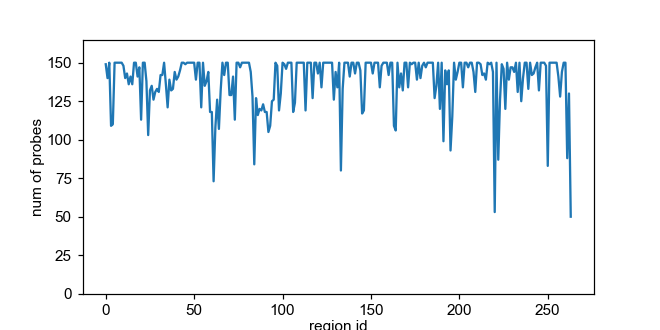

In [53]:
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict.items()}

pb_nums = np.array(list(pb_num_dict.values()))
plt.figure(figsize=(6,3), dpi=100)
plt.plot(pb_nums)
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"num of probes", labelpad=1)
plt.xlabel(f"region id", labelpad=1)
plt.ylim([0, num_probes_kept*1.1])
plt.show()

# 3. Load and asssemble probes

## 3.1 design readout mapping dict (region_to_readout)

1. parallel tracing
2. sequential tracing

In [73]:
np.sum(pb_nums)

36637

In [127]:
sorted_gene_list = []
genes = np.unique([_nm.split('-'+(_nm.split('-')[-1]))[0] for _nm in filtered_pb_dict ])
for _gene in genes:
    _gene_regs = [_nm for _nm in filtered_pb_dict if _gene in _nm]
    _gene_regs = [_nm for _nm in sorted(_gene_regs, key=lambda v:int(v.split('-')[-1]))]
    sorted_gene_list.extend(_gene_regs)

In [129]:
gene_2_readout_dict = {}
for _uid, _gene in enumerate(sorted_gene_list):
    _rds = [f'u{_uid}'] * 3
    #_rds.append(f"c{_gene.split('-')[-1]}")
    gene_2_readout_dict[_gene] = _rds

In [130]:
# save
pickle.dump(gene_2_readout_dict, open(os.path.join(library_folder, 'gene_2_readout.pkl'), 'wb'))

## 3.2 loading components

### primers
pick primer set 6,11

In [131]:
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Primers'
primers = library_tools.assemble.load_primers([16,15], _primer_folder=primer_folder)

- Picked primer: ID: W1B05_primer_16
Name: W1B05_primer_16
Description: W1B05_primer_16
Number of features: 0
Seq('CGGGTTTCGTTGCGCACACC')
- Picked primer: ID: W1B04_primer_15
Name: W1B04_primer_15
Description: W1B04_primer_15
Number of features: 0
Seq('TAATACGACTCACTATAGGGCTTGTGCATCGCGCCAAAGA')


### readouts

In [132]:
# summarize total readout usage
gene_2_readout_dict = pickle.load(open(os.path.join(library_folder, 'gene_2_readout.pkl'), 'rb'))

In [133]:
# collect types
readout_usage_by_type = {}
for _gene, _infos in gene_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

In [134]:
readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}
readout_dict ={}

In [135]:
readout_usage_dict

{'u': 264}

In [136]:
reload(library_tools.assemble)
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Readouts'
readout_start = 0
num_color = 2

unique_readouts = library_tools.assemble.load_readouts(250, 
                                                       _type='other_snr_after_630', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=num_color, # 750, 647
                                                       _start_id=readout_start,
                                                       )
append_unique_readouts = library_tools.assemble.load_readouts(readout_usage_dict['u']-250, 
                                                       _type='merfish_readouts', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=num_color, # 750, 647
                                                       _start_id=readout_start,
                                                       )
readout_dict['u'] = unique_readouts + append_unique_readouts

# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save


## 3.3 assemble probes

In [161]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict, 
                                               gene_2_readout_dict, readout_dict, primers, 
                                               primer_len=20, 
                                               num_readout_per_probe=3, 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 149 probes in region: Camk1-1
--- assemblying 140 probes in region: Camk1-10
--- assemblying 150 probes in region: Camk1-11
--- assemblying 109 probes in region: Camk1-12
--- assemblying 110 probes in region: Camk1-13
--- assemblying 150 probes in region: Camk1-14
--- assemblying 150 probes in region: Camk1-15
--- assemblying 150 probes in region: Camk1-16
--- assemblying 150 probes in region: Camk1-17
--- assemblying 150 probes in region: Camk1-18
--- assemblying 148 probes in region: Camk1-19
--- assemblying 140 probes in region: Camk1-2
--- assemblying 143 probes in region: Camk1-20
--- assemblying 136 probes in region: Camk1-21
--- assemblying 141 probes in region: Camk1-22
--- assemblying 136 probes in region: Camk1-23
--- assemblying 150 probes in region: Camk1-24
--- assemblying 150 probes in region: Camk1-25
--- assemblying 141 probes in region: Camk1-26
--- assem

--- assemblying 150 probes in region: Spp2-14
--- assemblying 140 probes in region: Spp2-15
--- assemblying 148 probes in region: Spp2-16
--- assemblying 150 probes in region: Spp2-17
--- assemblying 147 probes in region: Spp2-18
--- assemblying 150 probes in region: Spp2-19
--- assemblying 150 probes in region: Spp2-2
--- assemblying 150 probes in region: Spp2-20
--- assemblying 150 probes in region: Spp2-21
--- assemblying 127 probes in region: Spp2-22
--- assemblying 135 probes in region: Spp2-23
--- assemblying 150 probes in region: Spp2-24
--- assemblying 120 probes in region: Spp2-25
--- assemblying 150 probes in region: Spp2-26
--- assemblying 99 probes in region: Spp2-27
--- assemblying 145 probes in region: Spp2-28
--- assemblying 136 probes in region: Spp2-29
--- assemblying 145 probes in region: Spp2-3
--- assemblying 93 probes in region: Spp2-30
--- assemblying 115 probes in region: Spp2-31
--- assemblying 150 probes in region: Spp2-32
--- assemblying 139 probes in region: 

# 4.Check quality

## 4.1 Load probes

Checking procedures could restart from here

In [139]:
# folder for this library
# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 36637


In [140]:
num_readout_per_probe = 3
primer_len=20
target_len=40
min_num_probes = 50

### 4.1.1 check primer usage

In [141]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 36637
True


### 4.1.2 check region probe number

In [142]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: Camk1-1:- -> 149
gene: Camk1-10:- -> 140
gene: Camk1-11:- -> 150
gene: Camk1-12:- -> 109
gene: Camk1-13:- -> 110
gene: Camk1-14:- -> 150
gene: Camk1-15:- -> 150
gene: Camk1-16:- -> 150
gene: Camk1-17:- -> 150
gene: Camk1-18:- -> 150
gene: Camk1-19:- -> 148
gene: Camk1-2:- -> 140
gene: Camk1-20:- -> 143
gene: Camk1-21:- -> 136
gene: Camk1-22:- -> 141
gene: Camk1-23:- -> 136
gene: Camk1-24:- -> 150
gene: Camk1-25:- -> 150
gene: Camk1-26:- -> 141
gene: Camk1-27:- -> 147
gene: Camk1-28:- -> 113
gene: Camk1-29:- -> 150
gene: Camk1-3:- -> 150
gene: Camk1-30:- -> 138
gene: Camk1-31:- -> 103
gene: Camk1-32:- -> 132
gene: Camk1-33:- -> 135
gene: Camk1-34:- -> 126
gene: Camk1-35:- -> 131
gene: Camk1-36:- -> 133
gene: Camk1-37:- -> 131
gene: Camk1-38:- -> 142
gene: Camk1-39:- -> 142
gene: Camk1-4:- -> 150
gene: Camk1-40:- -> 136
gene: Camk1-41:- -> 121
gene: Camk1-42:- -> 139
gene: Camk1-43:- -> 132
gene: Camk1-44:- -> 133
gene: Camk1-45:- -> 144
gene: Camk1-46:- -> 139
gene: Camk1-47:- -> 

### 4.1.3 check readout usage for each gene

In [143]:
num_readout_per_probe

3

In [144]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=1)
print(reg2readout_check)

Camk1-1:- -> ['NDB_640']
Camk1-10:- -> ['NDB_674']
Camk1-11:- -> ['NDB_667']
Camk1-12:- -> ['NDB_677']
Camk1-13:- -> ['NDB_673']
Camk1-14:- -> ['NDB_686']
Camk1-15:- -> ['NDB_676']
Camk1-16:- -> ['NDB_692']
Camk1-17:- -> ['NDB_679']
Camk1-18:- -> ['NDB_695']
Camk1-19:- -> ['NDB_682']
Camk1-2:- -> ['NDB_632']
Camk1-20:- -> ['NDB_701']
Camk1-21:- -> ['NDB_685']
Camk1-22:- -> ['NDB_704']
Camk1-23:- -> ['NDB_688']
Camk1-24:- -> ['NDB_719']
Camk1-25:- -> ['NDB_697']
Camk1-26:- -> ['NDB_722']
Camk1-27:- -> ['NDB_724']
Camk1-28:- -> ['NDB_731']
Camk1-29:- -> ['NDB_733']
Camk1-3:- -> ['NDB_646']
Camk1-30:- -> ['NDB_764']
Camk1-31:- -> ['NDB_745']
Camk1-32:- -> ['NDB_770']
Camk1-33:- -> ['NDB_757']
Camk1-34:- -> ['NDB_782']
Camk1-35:- -> ['NDB_763']
Camk1-36:- -> ['NDB_794']
Camk1-37:- -> ['NDB_766']
Camk1-38:- -> ['NDB_797']
Camk1-39:- -> ['NDB_769']
Camk1-4:- -> ['NDB_656']
Camk1-40:- -> ['NDB_800']
Camk1-41:- -> ['NDB_781']
Camk1-42:- -> ['NDB_803']
Camk1-43:- -> ['NDB_787']
Camk1-44:- -> ['

In [152]:
reg_readout_dic

{'Camk1-1:-': ['NDB_640'],
 'Camk1-10:-': ['NDB_674'],
 'Camk1-11:-': ['NDB_667'],
 'Camk1-12:-': ['NDB_677'],
 'Camk1-13:-': ['NDB_673'],
 'Camk1-14:-': ['NDB_686'],
 'Camk1-15:-': ['NDB_676'],
 'Camk1-16:-': ['NDB_692'],
 'Camk1-17:-': ['NDB_679'],
 'Camk1-18:-': ['NDB_695'],
 'Camk1-19:-': ['NDB_682'],
 'Camk1-2:-': ['NDB_632'],
 'Camk1-20:-': ['NDB_701'],
 'Camk1-21:-': ['NDB_685'],
 'Camk1-22:-': ['NDB_704'],
 'Camk1-23:-': ['NDB_688'],
 'Camk1-24:-': ['NDB_719'],
 'Camk1-25:-': ['NDB_697'],
 'Camk1-26:-': ['NDB_722'],
 'Camk1-27:-': ['NDB_724'],
 'Camk1-28:-': ['NDB_731'],
 'Camk1-29:-': ['NDB_733'],
 'Camk1-3:-': ['NDB_646'],
 'Camk1-30:-': ['NDB_764'],
 'Camk1-31:-': ['NDB_745'],
 'Camk1-32:-': ['NDB_770'],
 'Camk1-33:-': ['NDB_757'],
 'Camk1-34:-': ['NDB_782'],
 'Camk1-35:-': ['NDB_763'],
 'Camk1-36:-': ['NDB_794'],
 'Camk1-37:-': ['NDB_766'],
 'Camk1-38:-': ['NDB_797'],
 'Camk1-39:-': ['NDB_769'],
 'Camk1-4:-': ['NDB_656'],
 'Camk1-40:-': ['NDB_800'],
 'Camk1-41:-': ['NDB_781

### 4.1.4 check readout usage in the library

In [158]:
print(full_records[0].seq.reverse_complement())

CTTGTGCATCGCGCCAAAGAATCCGCGGTCATCGTTGTTAATCCGCGGTCATCGTTGTTAGCATGCATAAATTACTGTGACATGAATAGAGTGAGTTAGCATCCGCGGTCATCGTTGTTAGGTGTGCGCAACGAAACCCG


In [155]:
check._parsing_probe_sequence(full_records[0], target_len=target_len)

(Seq('TCACAGTAATTTATGCATGCTAACAACGATGACCGCGGAT'),
 [Seq('ATCCGCGGTCATCGTTGTTA'),
  Seq('CATGAATAGAGTGAGTTAGC'),
  Seq('ATCCGCGGTCATCGTTGTTA')],
 Seq('CGGGTTTCGTTGCGCACACC'),
 Seq('CTTGTGCATCGCGCCAAAGA'))

In [171]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(reg_readout_dic, full_records, 
                                                                    check_readout_dict, primer_len=primer_len, 
                                                                    target_len=target_len,
                                                                    probe_readout_num=num_readout_per_probe)

print(readout2reg_check)

-- extracting probes from >region:Camk1-1:-, region:Camk1-10:-, region:Camk1-11:-, region:Camk1-12:-, region:Camk1-13:-, region:Camk1-14:-, region:Camk1-15:-, region:Camk1-16:-, region:Camk1-17:-, region:Camk1-18:-, region:Camk1-19:-, region:Camk1-2:-, region:Camk1-20:-, region:Camk1-21:-, region:Camk1-22:-, region:Camk1-23:-, region:Camk1-24:-, region:Camk1-25:-, region:Camk1-26:-, region:Camk1-27:-, region:Camk1-28:-, region:Camk1-29:-, region:Camk1-3:-, region:Camk1-30:-, region:Camk1-31:-, region:Camk1-32:-, region:Camk1-33:-, region:Camk1-34:-, region:Camk1-35:-, region:Camk1-36:-, region:Camk1-37:-, region:Camk1-38:-, region:Camk1-39:-, region:Camk1-4:-, region:Camk1-40:-, region:Camk1-41:-, region:Camk1-42:-, region:Camk1-43:-, region:Camk1-44:-, region:Camk1-45:-, region:Camk1-46:-, region:Camk1-47:-, region:Camk1-48:-, region:Camk1-49:-, region:Camk1-5:-, region:Camk1-50:-, region:Camk1-51:-, region:Camk1-52:-, region:Camk1-53:-, region:Camk1-54:-, region:Camk1-6:-, region:Cam

### 4.1.5 check bewteen probes

In [174]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder) 

-- saving internal 17-mer map to file:\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\probe_table_17.npz


In [177]:
# internal check probes
reload(check)
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [179]:
# check between probes
reload(check)
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, target_len=target_len)

--- Sequence:loc_6:113284124-113294124_gene_Camk1-6:-_pb_53_pos_3540_strand_-_readouts_[NDB_662_u,NDB_662_u,NDB_662_u] got hits:53, dumped
--- Sequence:loc_6:113284124-113294124_gene_Camk1-6:-_pb_54_pos_3581_strand_+_readouts_[NDB_662_u,NDB_662_u,NDB_662_u] got hits:52, dumped
--- Sequence:loc_2:75741924-75751924_gene_Hoxd10-116:+_pb_65_pos_6013_strand_+_readouts_[NDB_1127_u,NDB_1127_u,NDB_1127_u] got hits:90, dumped
--- Sequence:loc_2:75741924-75751924_gene_Hoxd10-116:+_pb_66_pos_6080_strand_+_readouts_[NDB_1127_u,NDB_1127_u,NDB_1127_u] got hits:91, dumped
--- Sequence:loc_2:75741924-75751924_gene_Hoxd10-116:+_pb_67_pos_6518_strand_-_readouts_[NDB_1127_u,NDB_1127_u,NDB_1127_u] got hits:80, dumped
--- Sequence:loc_2:75741924-75751924_gene_Hoxd10-116:+_pb_69_pos_6635_strand_+_readouts_[NDB_1127_u,NDB_1127_u,NDB_1127_u] got hits:71, dumped
--- Sequence:loc_2:75741924-75751924_gene_Hoxd10-116:+_pb_70_pos_6754_strand_-_readouts_[NDB_1127_u,NDB_1127_u,NDB_1127_u] got hits:95, dumped
--- Seq

In [180]:
del(int_map)

### 4.1.6 finish checking, save

In [181]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

In [182]:
blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

check.Blast_probes(kept_records, library_folder, num_threads=32, 
                   blast_db=blast_database, blast_evalue=100, overwrite=False)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 36608
-- processing region: Camk1-10:- with 140 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Camk1-10:-.fasta
--- *blasting region: Camk1-10:-
--- total time for blast Camk1-10:-: 12.392135620117188
-- processing region: Camk1-11:- with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Camk1-11:-.fasta
--- *blasting region: Camk1-11:-
--- total time for blast Camk1-11:-: 29.53890609741211
-- processing region: Camk1-12:- with 109 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Camk1-12:-.fasta
--- *blasting region: Camk1-12:-
--- total time for blast Camk1-12:-: 7.975998640060425
-- processing region: Camk1-13:- with 

--- total time for blast Camk1-38:-: 9.337525129318237
-- processing region: Camk1-39:- with 142 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Camk1-39:-.fasta
--- *blasting region: Camk1-39:-
--- total time for blast Camk1-39:-: 24.34396266937256
-- processing region: Camk1-3:- with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Camk1-3:-.fasta
--- *blasting region: Camk1-3:-
--- total time for blast Camk1-3:-: 11.654840469360352
-- processing region: Camk1-40:- with 136 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Camk1-40:-.fasta
--- *blasting region: Camk1-40:-
--- total time for blast Camk1-40:-: 7.753001689910889
-- processing region: Camk1-41:- with 121 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pair

--- total time for blast Hoxd10-107:+: 7.447998762130737
-- processing region: Hoxd10-108:+ with 107 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-108:+.fasta
--- *blasting region: Hoxd10-108:+
--- total time for blast Hoxd10-108:+: 67.81745767593384
-- processing region: Hoxd10-109:+ with 132 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-109:+.fasta
--- *blasting region: Hoxd10-109:+
--- total time for blast Hoxd10-109:+: 13.780049562454224
-- processing region: Hoxd10-10:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-10:+.fasta
--- *blasting region: Hoxd10-10:+
--- total time for blast Hoxd10-10:+: 5.8699517250061035
-- processing region: Hoxd10-110:+ with 142 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-1

--- total time for blast Hoxd10-27:+: 77.93261909484863
-- processing region: Hoxd10-28:+ with 109 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-28:+.fasta
--- *blasting region: Hoxd10-28:+
--- total time for blast Hoxd10-28:+: 9.436001777648926
-- processing region: Hoxd10-29:+ with 125 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-29:+.fasta
--- *blasting region: Hoxd10-29:+
--- total time for blast Hoxd10-29:+: 8.259000062942505
-- processing region: Hoxd10-2:+ with 84 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-2:+.fasta
--- *blasting region: Hoxd10-2:+
--- total time for blast Hoxd10-2:+: 13.399704217910767
-- processing region: Hoxd10-30:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_

--- total time for blast Hoxd10-55:+: 12.827172756195068
-- processing region: Hoxd10-56:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-56:+.fasta
--- *blasting region: Hoxd10-56:+
--- total time for blast Hoxd10-56:+: 7.828001976013184
-- processing region: Hoxd10-57:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-57:+.fasta
--- *blasting region: Hoxd10-57:+
--- total time for blast Hoxd10-57:+: 7.975000381469727
-- processing region: Hoxd10-58:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-58:+.fasta
--- *blasting region: Hoxd10-58:+
--- total time for blast Hoxd10-58:+: 9.5749990940094
-- processing region: Hoxd10-59:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promot

--- total time for blast Hoxd10-83:+: 6.524001359939575
-- processing region: Hoxd10-84:+ with 134 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-84:+.fasta
--- *blasting region: Hoxd10-84:+
--- total time for blast Hoxd10-84:+: 6.841999530792236
-- processing region: Hoxd10-85:+ with 148 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-85:+.fasta
--- *blasting region: Hoxd10-85:+
--- total time for blast Hoxd10-85:+: 9.07400131225586
-- processing region: Hoxd10-86:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Hoxd10-86:+.fasta
--- *blasting region: Hoxd10-86:+
--- total time for blast Hoxd10-86:+: 6.68600058555603
-- processing region: Hoxd10-87:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promote

--- total time for blast Spp2-21:+: 16.80300235748291
-- processing region: Spp2-22:+ with 127 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-22:+.fasta
--- *blasting region: Spp2-22:+
--- total time for blast Spp2-22:+: 12.573998928070068
-- processing region: Spp2-23:+ with 135 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-23:+.fasta
--- *blasting region: Spp2-23:+
--- total time for blast Spp2-23:+: 8.64099907875061
-- processing region: Spp2-24:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-24:+.fasta
--- *blasting region: Spp2-24:+
--- total time for blast Spp2-24:+: 9.747999429702759
-- processing region: Spp2-25:+ with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\pro

--- total time for blast Spp2-50:+: 16.80500102043152
-- processing region: Spp2-51:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-51:+.fasta
--- *blasting region: Spp2-51:+
--- total time for blast Spp2-51:+: 7.694000005722046
-- processing region: Spp2-52:+ with 144 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-52:+.fasta
--- *blasting region: Spp2-52:+
--- total time for blast Spp2-52:+: 13.240005016326904
-- processing region: Spp2-53:+ with 53 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-53:+.fasta
--- *blasting region: Spp2-53:+
--- total time for blast Spp2-53:+: 4.402994871139526
-- processing region: Spp2-54:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\pro

--- total time for blast Spp2-7:+: 10.358999490737915
-- processing region: Spp2-80:+ with 83 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-80:+.fasta
--- *blasting region: Spp2-80:+
--- total time for blast Spp2-80:+: 8.008002042770386
-- processing region: Spp2-81:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-81:+.fasta
--- *blasting region: Spp2-81:+
--- total time for blast Spp2-81:+: 28.295573472976685
-- processing region: Spp2-82:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\probe_gene_Spp2-82:+.fasta
--- *blasting region: Spp2-82:+
--- total time for blast Spp2-82:+: 11.838996648788452
-- processing region: Spp2-83:+ with 150 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\blast\pr

### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [183]:
# screen
num_probes_per_region = 100
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(library_folder, 
                                                                                             num_probes_per_region,
                                                                                             hard_thres=target_len,
                                                                                             soft_count_th=50,
                                                                                             )

- Number of probes loaded: 36608
- Number of regions in this library: 264
-- checking probes in region: Camk1-1:-
--- gene=Camk1-1:-, id=135 removed by soft count = 104
--- number of probes: 149 , kept by blast: 148 , if remove dups: 148
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Camk1-10:-
--- gene=Camk1-10:-, id=45 removed by soft count = 147
--- gene=Camk1-10:-, id=99 removed by soft count = 175
--- gene=Camk1-10:-, id=108 removed by soft count = 149
--- number of probes: 140 , kept by blast: 137 , if remove dups: 137
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Camk1-11:-
--- gene=Camk1-11:-, id=92 removed by soft count = 3137
--- number of probes: 150 , kept by blast: 149 , if remove dups: 149
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
--

--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Camk1-30:-
--- gene=Camk1-30:-, id=19 removed by soft count = 113
--- gene=Camk1-30:-, id=20 removed by soft count = 156
--- gene=Camk1-30:-, id=89 removed by soft count = 149
--- gene=Camk1-30:-, id=98 removed by soft count = 190
--- gene=Camk1-30:-, id=106 removed by soft count = 147
--- gene=Camk1-30:-, id=108 removed by soft count = 80
--- gene=Camk1-30:-, id=109 removed by soft count = 179
--- gene=Camk1-30:-, id=110 removed by soft count = 353
--- number of probes: 138 , kept by blast: 130 , if remove dups: 130
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Camk1-31:-
--- gene=Camk1-31:-, id=19 removed by soft count = 83
--- number of probes: 103 , kept by blast: 102 , if remove dups: 102
--

--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Camk1-50:-
--- gene=Camk1-50:-, id=117 removed by soft count = 240
--- number of probes: 149 , kept by blast: 148 , if remove dups: 148
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Camk1-51:-
--- gene=Camk1-51:-, id=11 removed by soft count = 80
--- gene=Camk1-51:-, id=12 removed by soft count = 52
--- gene=Camk1-51:-, id=13 removed by soft count = 88
--- gene=Camk1-51:-, id=41 removed by soft count = 789
--- gene=Camk1-51:-, id=42 removed by soft count = 106
--- gene=Camk1-51:-, id=66 removed by soft count = 427
--- number of probes: 150 , kept by blast: 144 , if remove dups: 144
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checkin

--- number of probes: 150 , kept by blast: 148 , if remove dups: 148
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-113:+
--- gene=Hoxd10-113:+, id=11 removed by soft count = 284
--- gene=Hoxd10-113:+, id=14 removed by soft count = 142
--- gene=Hoxd10-113:+, id=27 removed by soft count = 64
--- gene=Hoxd10-113:+, id=41 removed by soft count = 1212
--- number of probes: 129 , kept by blast: 125 , if remove dups: 125
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-114:+
--- gene=Hoxd10-114:+, id=46 removed by soft count = 98
--- number of probes: 129 , kept by blast: 128 , if remove dups: 128
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-115:+
--- gene=Hoxd10-115:+, id=85 removed by soft count = 101
--- g

--- number of probes: 109 , kept by blast: 106 , if remove dups: 106
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-29:+
--- gene=Hoxd10-29:+, id=33 removed by soft count = 378
--- gene=Hoxd10-29:+, id=74 removed by soft count = 125
--- number of probes: 125 , kept by blast: 123 , if remove dups: 123
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-3:+
--- gene=Hoxd10-3:+, id=0 removed by soft count = 241
--- gene=Hoxd10-3:+, id=13 removed by soft count = 93
--- gene=Hoxd10-3:+, id=14 removed by soft count = 9654
--- gene=Hoxd10-3:+, id=56 removed by soft count = 60
--- number of probes: 126 , kept by blast: 122 , if remove dups: 122
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-30:+
--- number of probes

--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-54:+
--- gene=Hoxd10-54:+, id=41 removed by soft count = 760
--- gene=Hoxd10-54:+, id=42 removed by soft count = 242
--- gene=Hoxd10-54:+, id=43 removed by soft count = 153
--- gene=Hoxd10-54:+, id=46 removed by soft count = 73
--- gene=Hoxd10-54:+, id=47 removed by soft count = 195
--- number of probes: 134 , kept by blast: 129 , if remove dups: 129
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-55:+
--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-56:+
--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
-

--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-8:+
--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-80:+
--- gene=Hoxd10-80:+, id=82 removed by soft count = 128
--- gene=Hoxd10-80:+, id=108 removed by soft count = 88
--- gene=Hoxd10-80:+, id=110 removed by soft count = 141
--- number of probes: 143 , kept by blast: 140 , if remove dups: 140
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Hoxd10-81:+
--- number of probes: 150 , kept by blast: 150 , if remove dups: 150
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- che

--- gene=Spp2-14:+, id=71 removed by soft count = 156
--- gene=Spp2-14:+, id=114 removed by soft count = 64
--- number of probes: 150 , kept by blast: 144 , if remove dups: 144
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-15:+
--- gene=Spp2-15:+, id=12 removed by soft count = 115
--- gene=Spp2-15:+, id=13 removed by soft count = 256
--- gene=Spp2-15:+, id=14 removed by soft count = 430
--- gene=Spp2-15:+, id=16 removed by soft count = 81
--- gene=Spp2-15:+, id=29 removed by soft count = 100
--- gene=Spp2-15:+, id=76 removed by soft count = 68
--- number of probes: 140 , kept by blast: 134 , if remove dups: 134
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-16:+
--- gene=Spp2-16:+, id=26 removed by soft count = 220
--- gene=Spp2-16:+, id=115 removed by soft count = 1012
--- number of probes: 148 , ke

--- gene=Spp2-36:+, id=58 removed by soft count = 56
--- gene=Spp2-36:+, id=116 removed by soft count = 86
--- gene=Spp2-36:+, id=117 removed by soft count = 106
--- number of probes: 150 , kept by blast: 147 , if remove dups: 147
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-37:+
--- gene=Spp2-37:+, id=1 removed by soft count = 355
--- gene=Spp2-37:+, id=43 removed by soft count = 236
--- gene=Spp2-37:+, id=69 removed by soft count = 4048
--- gene=Spp2-37:+, id=92 removed by soft count = 154
--- gene=Spp2-37:+, id=102 removed by soft count = 170
--- number of probes: 134 , kept by blast: 129 , if remove dups: 129
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-38:+
--- gene=Spp2-38:+, id=87 removed by soft count = 52
--- number of probes: 150 , kept by blast: 149 , if remove dups: 149
--- remove dupl

--- gene=Spp2-56:+, id=51 removed by soft count = 176
--- gene=Spp2-56:+, id=61 removed by soft count = 62
--- number of probes: 126 , kept by blast: 123 , if remove dups: 123
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-57:+
--- number of probes: 149 , kept by blast: 149 , if remove dups: 148
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-58:+
--- gene=Spp2-58:+, id=124 removed by soft count = 510
--- gene=Spp2-58:+, id=141 removed by soft count = 900
--- number of probes: 146 , kept by blast: 144 , if remove dups: 143
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-59:+
--- gene=Spp2-59:+, id=0 removed by soft count = 240
--- gene=Spp2-59:+, id=1 removed by soft count = 86
--- gene=Spp2-59:+, id=6 removed 

--- gene=Spp2-75:+, id=149 removed by soft count = 104
--- number of probes: 150 , kept by blast: 147 , if remove dups: 147
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-76:+
--- gene=Spp2-76:+, id=62 removed by soft count = 107
--- gene=Spp2-76:+, id=65 removed by soft count = 89
--- gene=Spp2-76:+, id=67 removed by soft count = 69
--- number of probes: 132 , kept by blast: 129 , if remove dups: 129
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes in region: Spp2-77:+
--- gene=Spp2-77:+, id=20 removed by soft count = 101
--- gene=Spp2-77:+, id=103 removed by soft count = 69
--- gene=Spp2-77:+, id=106 removed by soft count = 99
--- number of probes: 150 , kept by blast: 147 , if remove dups: 147
--- remove duplicated probes
--- keep probes from beginning
-- number of probes kept for this region: 100
-- checking probes

-- region: Spp2-80:+ , number of probes: 83
-- region: Spp2-81:+ , number of probes: 100
-- region: Spp2-82:+ , number of probes: 100
-- region: Spp2-83:+ , number of probes: 100
-- region: Spp2-84:+ , number of probes: 100
-- region: Spp2-85:+ , number of probes: 100
-- region: Spp2-86:+ , number of probes: 100
-- region: Spp2-87:+ , number of probes: 100
-- region: Spp2-88:+ , number of probes: 100
-- region: Spp2-89:+ , number of probes: 100
-- region: Spp2-9:+ , number of probes: 100
-- region: Spp2-90:+ , number of probes: 88
-- region: Spp2-91:+ , number of probes: 100
-- region: Spp2-92:+ , number of probes: 44
- Number of probes kept: 26147
- Saving to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Promoter_enhancer_pairs\.\blast_full_probes.fasta
